Author: Ryan Inghilterra - DSE 210 - Worksheet 9 Clustering

In [1]:
import pandas as pd
from sklearn.cluster import KMeans

read in the data, there are 50 animals in the dataset and there are 85 different features

In [2]:
train_data = pd.read_table('Animals_with_Attributes/predicate-matrix-continuous.txt', delim_whitespace=True, header=None)
animal_names = pd.read_table('Animals_with_Attributes/classes.txt', delim_whitespace=True, header=None)
print(train_data.shape)
train_data['animal_name'] = animal_names[1]
train_data = train_data.set_index('animal_name')
train_data.head()

(50, 85)


,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
animal_name,,,,,,,,,,,,,,,,,,,,,
antelope,-1.00,-1.00,-1.0,-1.00,12.34,0.0,0.0,0.0,16.11,9.19,...,0.00,0.00,1.23,10.49,39.24,17.57,50.59,2.35,9.70,8.38
grizzly+bear,39.25,1.39,0.0,74.14,3.75,0.0,0.0,0.0,1.25,0.00,...,7.64,9.79,53.14,61.80,12.50,24.00,3.12,58.64,20.14,11.39
killer+whale,83.40,64.79,0.0,0.00,1.25,0.0,0.0,0.0,68.49,32.69,...,79.49,0.00,0.00,38.27,9.77,52.03,24.94,15.77,13.41,15.42
beaver,19.38,0.00,0.0,87.81,7.50,0.0,0.0,0.0,0.00,7.50,...,65.62,0.00,0.00,3.75,31.88,41.88,23.44,31.88,33.44,13.12
dalmatian,69.58,73.33,0.0,6.39,0.00,0.0,0.0,0.0,37.08,100.00,...,1.25,6.25,0.00,9.38,31.67,53.26,24.44,29.38,11.25,72.71


**(3)** Load the real-valued array, and also the animal names, into Python. Run k-means on the data (from
sklearn.cluster) and ask for k = 10 clusters. For each cluster, list the animals in it. Does the
clustering make sense?

In [3]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(train_data)
kmeans_results = kmeans.predict(train_data)
kmeans_results

array([5, 8, 2, 3, 1, 1, 5, 9, 2, 1, 6, 6, 9, 7, 9, 0, 4, 2, 7, 4, 0, 9, 0,
       2, 4, 6, 6, 7, 6, 6, 5, 9, 1, 6, 1, 3, 0, 5, 4, 5, 9, 0, 9, 6, 8, 1,
       2, 6, 0, 2], dtype=int32)

In [4]:
train_data['cluster'] = kmeans_results
final_df = train_data.sort_values('cluster')
cluster_dic = {}
for i in final_df['cluster'].unique():
    cluster_dic[i] = list(final_df[final_df['cluster'] == i].index.values)

In [5]:
cluster_dic.items() # lets print the resulting clusters

[(0, ['ox', 'cow', 'pig', 'moose', 'sheep', 'buffalo']),
 (1,
  ['dalmatian',
   'persian+cat',
   'collie',
   'siamese+cat',
   'chihuahua',
   'weasel']),
 (2,
  ['seal',
   'humpback+whale',
   'dolphin',
   'blue+whale',
   'killer+whale',
   'walrus']),
 (3, ['beaver', 'otter']),
 (4, ['giant+panda', 'chimpanzee', 'gorilla', 'spider+monkey']),
 (5, ['horse', 'deer', 'zebra', 'giraffe', 'antelope']),
 (6,
  ['bat',
   'raccoon',
   'mouse',
   'rabbit',
   'skunk',
   'squirrel',
   'mole',
   'hamster',
   'rat']),
 (7, ['hippopotamus', 'elephant', 'rhinoceros']),
 (8, ['polar+bear', 'grizzly+bear']),
 (9, ['leopard', 'bobcat', 'german+shepherd', 'lion', 'wolf', 'fox', 'tiger'])]

the clustering results make sense for the 10 different clusters!

-4. Now hierarchically cluster this data, using scipy.cluster.hierarchy.linkage. Choose Ward’s
method, and plot the resulting tree using the dendrogram method, setting the orientation parameter
to ‘right’ and labeling each leaf with the corresponding animal name.

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from pylab import rcParams

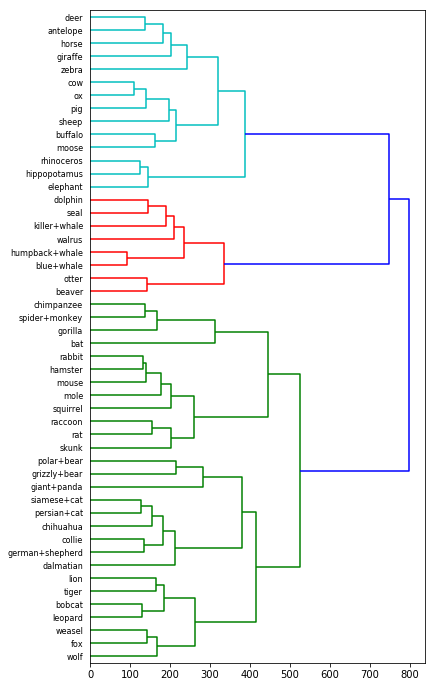

In [7]:
X = [[i] for i in [2, 8, 0, 4, 1, 9, 9, 0]]
X = train_data
Z = linkage(X, 'ward')
rcParams["figure.figsize"] = 6, 12
dn = dendrogram(Z, orientation='right', labels=train_data.index.values)

result of heiarchical clustering looks good!